## Baseline Scenario

#### Fixed Split:

- Bandwidth: 50% to user equipment, 50% to sensors
- Computational power: 50% to user equipment, 50% to sensors

In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt

# predefined smart city scenario
from mobile_env.scenarios.smart_city import MComSmartCity

In [2]:
env = gym.make("mobile-smart_city-smart_city_handler-v0", render_mode="rgb_array")

print(f"\nSmart city environment with {env.NUM_USERS} users, {env.NUM_SENSORS} sensors and {env.NUM_STATIONS} cells.")


Smart city environment with 10 users, 20 sensors and 1 cells.


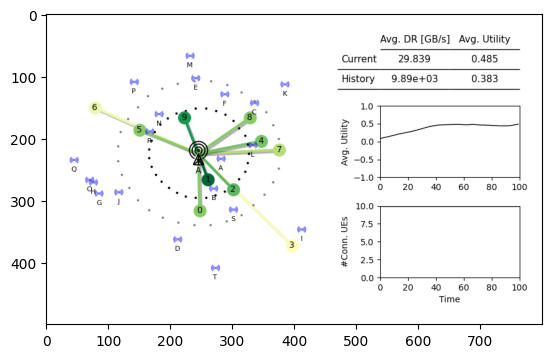

In [3]:
from IPython import display
import cProfile
import pstats

profiler = cProfile.Profile()
done = False
obs, info = env.reset()
total_episode_reward = 0
total_reward_over_time = []

for _ in range(100):
    dummy_action = (0.50, 0.50)
    
    # Profile the step function
    profiler.enable()
    obs, reward, terminated, truncated, info = env.step(dummy_action)
    profiler.disable()
    
    total_episode_reward += reward
    total_reward_over_time.append(total_episode_reward)

    plt.imshow(env.render())
    display.display(plt.gcf())
    display.clear_output(wait=True)

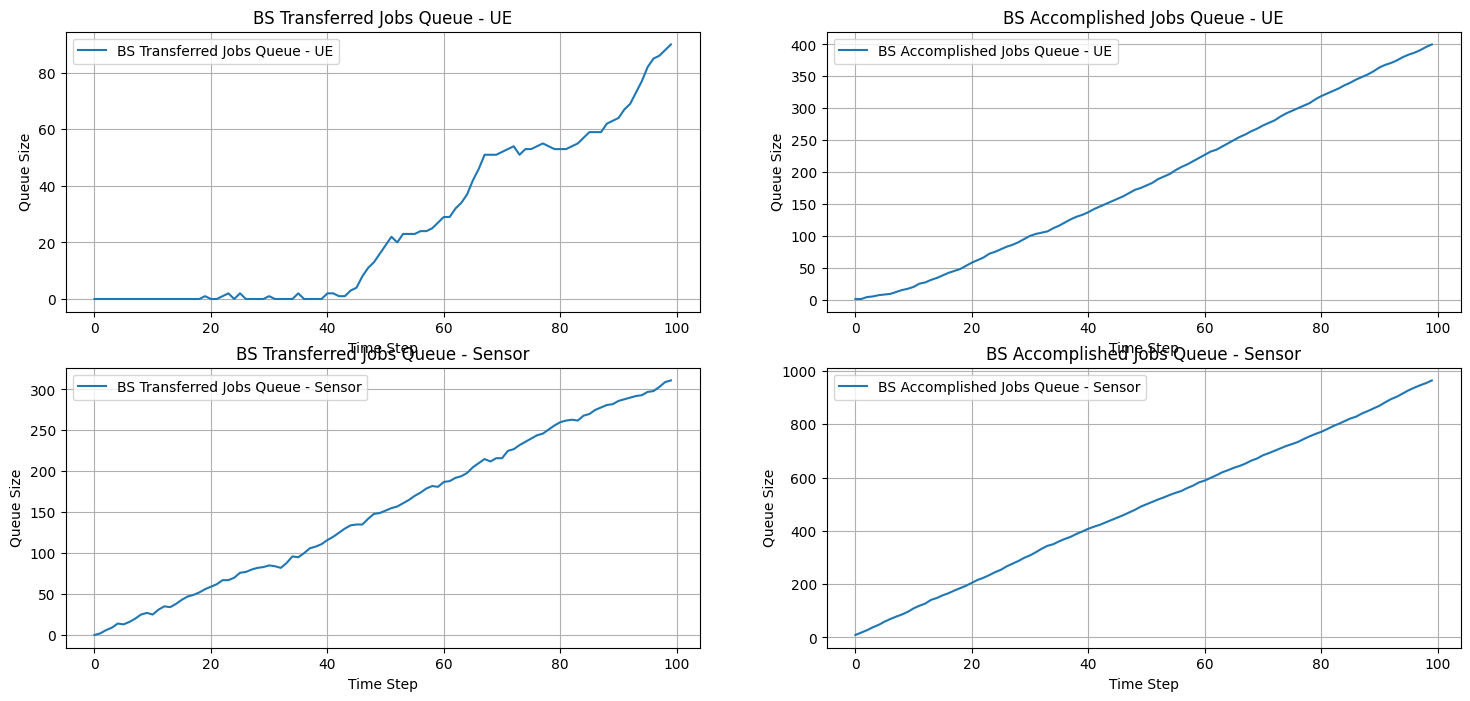

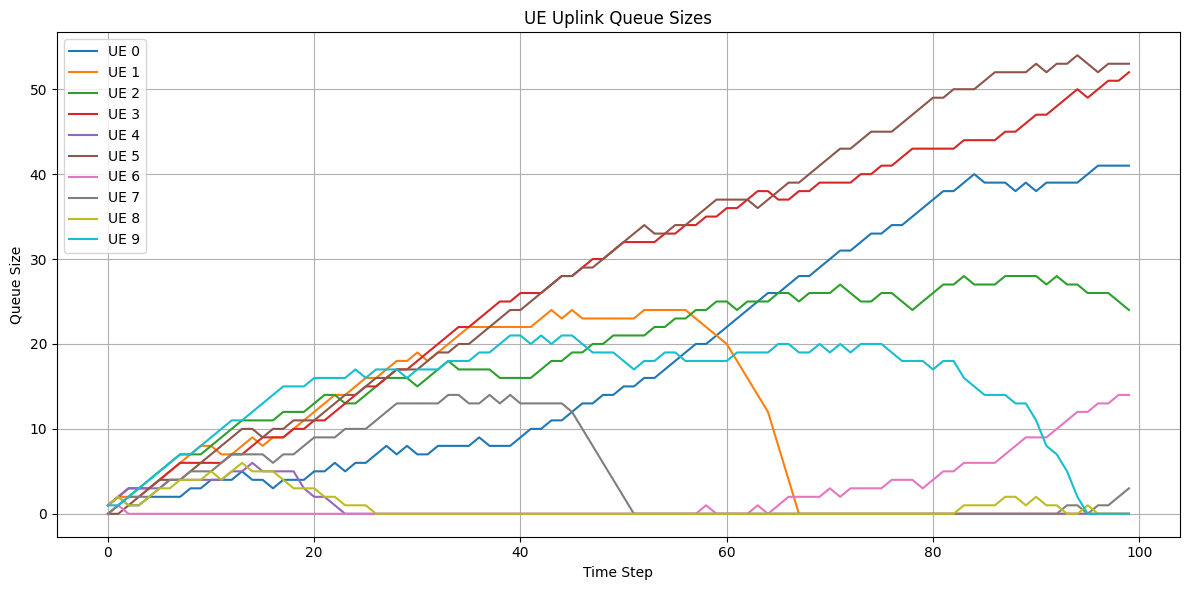

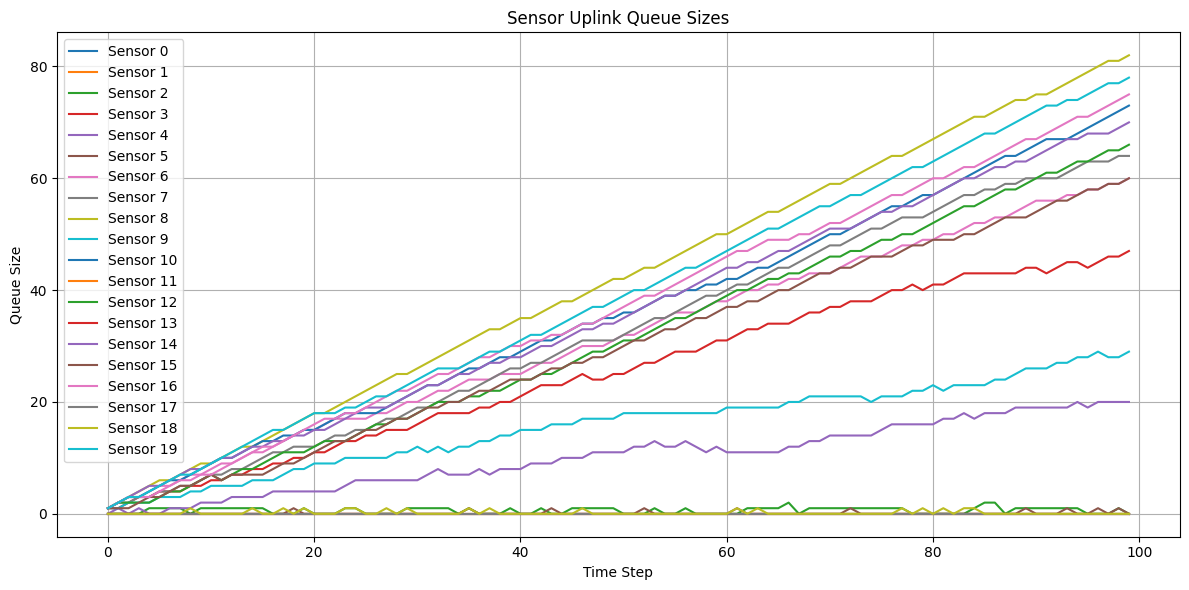

In [4]:
env.queue_size_metrics.plot_queue_sizes()
env.queue_size_metrics.export(filename="queuesize.json")

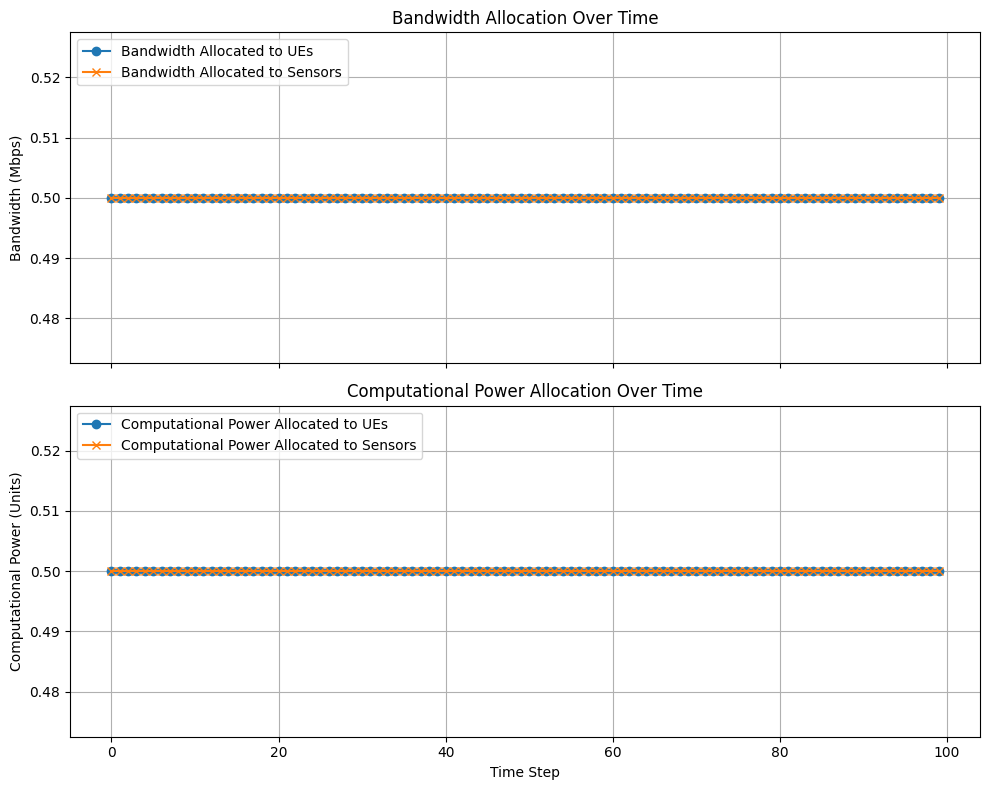

In [5]:
env.allocation_metrics.plot_allocations()
env.allocation_metrics.export(filename="allocation.json")

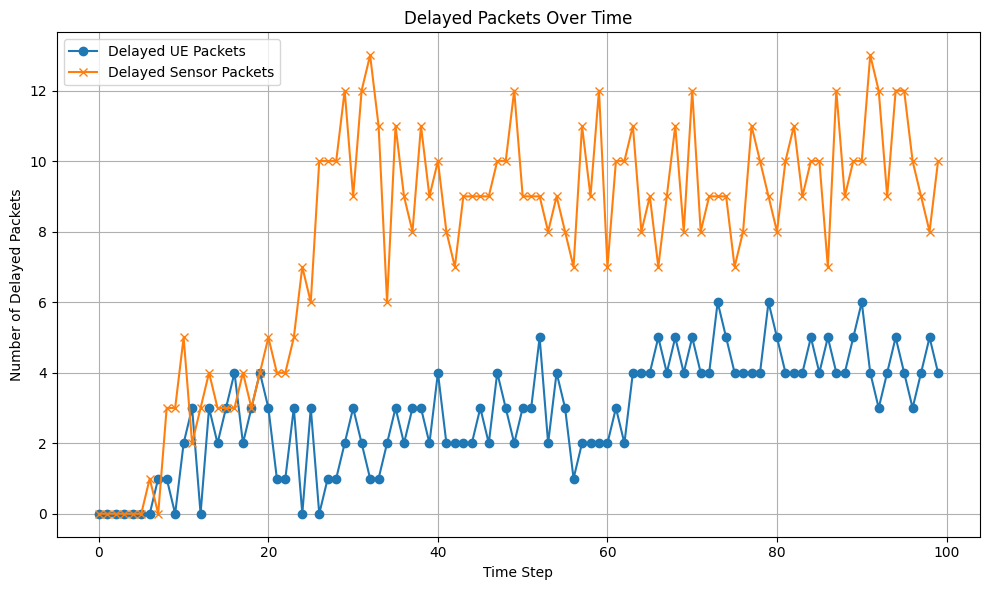

In [6]:
env.delay_metrics.plot_delayed_packets()
env.delay_metrics.export(filename="delayed_packets.json")

In [7]:
# Display profiling results
stats = pstats.Stats(profiler)
stats.sort_stats("cumulative").print_stats(20)  # Show top 20 functions by cumulative time

         46934791 function calls (46596993 primitive calls) in 15.404 seconds

   Ordered by: cumulative time
   List reduced from 813 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      100    0.000    0.000   15.404    0.154 /Users/elifohri/Library/Python/3.9/lib/python/site-packages/gymnasium/wrappers/order_enforcing.py:52(step)
      100    0.000    0.000   15.403    0.154 /Users/elifohri/Library/Python/3.9/lib/python/site-packages/gymnasium/wrappers/env_checker.py:43(step)
      100    0.006    0.000   15.403    0.154 /Users/elifohri/Documents/mobile-env/mobile_env/core/base.py:467(step)
   484342    0.243    0.000    8.750    0.000 /Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/logging/__init__.py:1436(info)
   484342    0.269    0.000    8.446    0.000 /Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/logging/__init__.py:

In [8]:
profiler.dump_stats("step_function_profile.prof")

In [9]:

stats = pstats.Stats("step_function_profile.prof")
stats.sort_stats("cumulative").print_stats(90)

Thu Dec 19 01:07:19 2024    step_function_profile.prof

         46934791 function calls (46596993 primitive calls) in 15.404 seconds

   Ordered by: cumulative time
   List reduced from 813 to 90 due to restriction <90>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      100    0.000    0.000   15.404    0.154 /Users/elifohri/Library/Python/3.9/lib/python/site-packages/gymnasium/wrappers/order_enforcing.py:52(step)
      100    0.000    0.000   15.403    0.154 /Users/elifohri/Library/Python/3.9/lib/python/site-packages/gymnasium/wrappers/env_checker.py:43(step)
      100    0.006    0.000   15.403    0.154 /Users/elifohri/Documents/mobile-env/mobile_env/core/base.py:467(step)
   484342    0.243    0.000    8.750    0.000 /Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/logging/__init__.py:1436(info)
   484342    0.269    0.000    8.446    0.000 /Library/Developer/CommandLineTools/Library/Frameworks/Python3.f

In [10]:
profiler.dump_stats("step_function_profile.prof")
